# Vehicle Malfunction/Accident Detection System

* Fast-Fourier Transform model on wheel bearing vibrational data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

data=pd.read_csv("2003.10.22.12.06.24", header=None, names=["b1x","b1y","b2x","b2y","b3x","b3y","b4x","b4y"], delimiter=r"\s+")
data.head()

,b1x,b1y,b2x,b2y,b3x,b3y,b4x,b4y
0,-0.022,-0.039,-0.183,-0.054,-0.105,-0.134,-0.129,-0.142
1,-0.105,-0.017,-0.164,-0.183,-0.049,0.029,-0.115,-0.122
2,-0.183,-0.098,-0.195,-0.125,-0.005,-0.007,-0.171,-0.071
3,-0.178,-0.161,-0.159,-0.178,-0.100,-0.115,-0.112,-0.078
4,-0.208,-0.129,-0.261,-0.098,-0.151,-0.205,-0.063,-0.066


In [2]:
data.describe()

,b1x,b1y,b2x,b2y,b3x,b3y,b4x,b4y
count,20480.000000,20480.00000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000,20480.000000
mean,-0.094593,-0.09388,-0.093817,-0.093752,-0.090812,-0.090881,-0.090969,-0.094235
std,0.081124,0.07065,0.090650,0.077510,0.091463,0.095488,0.060086,0.066382
min,-0.720000,-0.56400,-0.674000,-0.530000,-0.496000,-0.784000,-0.413000,-0.471000
25%,-0.146000,-0.13900,-0.156000,-0.146000,-0.151000,-0.154000,-0.129000,-0.134000
50%,-0.095000,-0.09300,-0.093000,-0.093000,-0.090000,-0.090000,-0.090000,-0.095000
75%,-0.042000,-0.04900,-0.032000,-0.042000,-0.029000,-0.029000,-0.054000,-0.054000
max,0.388000,0.70100,0.359000,0.256000,0.400000,0.415000,0.249000,0.374000


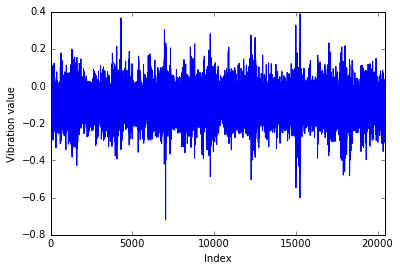

In [3]:
%matplotlib inline
data.b1x.plot()
plt.xlabel("Index")
plt.ylabel("Vibration value")
plt.savefig("rawdata.png")
plt.show()

## Initial Observations (b1x)

* plot above represents 1-second snapshot in life of bearing
* mean value < 0, between 0.0 and -0.1
* max and min are sometimes outliers
* spikes in value regularly spaced
* spike in -ve value corresponds with extreme +ve value
* graphs for each bearing plotted below

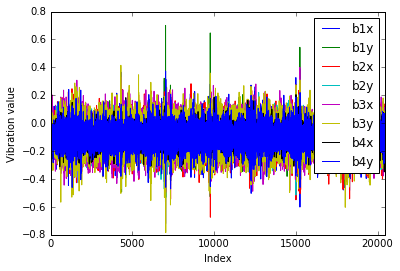

In [4]:
ax=data.plot()
plt.xlabel("Index")
plt.ylabel("Vibration value")
plt.show()

# Feature Extraction 

* condense dataset
* ensure features are representative of process to be modelled

(0, 1000)

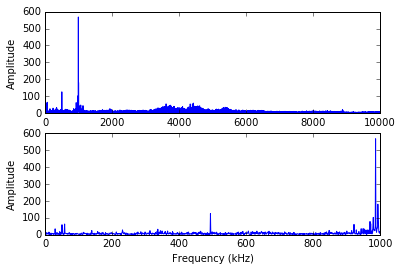

In [5]:
src=data.b1x
import scipy.fftpack

N = 20480
T = 1.0 / 20000.0
yf = scipy.fftpack.fft(src)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

freqs=xf[1:]
amps=np.abs(yf[0:N/2])[1:]

plt.subplot(2, 1, 1)
plt.plot(freqs, amps)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freqs, amps)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
plt.xlim(0, 1000) 

In [6]:
df = pd.DataFrame({'Amplitudes':amps, 'Frequency':freqs})

print "Tabulate frequencies with top amplitudes..."
print "note: outliers are at 49.8Hz, 57.6Hz, and 493.2Hz."
res=df.sort_values(by=["Amplitudes"], ascending=False).head(15)
res.head(5)

Tabulate frequencies with top amplitudes...
note: outliers are at 49.8Hz, 57.6Hz, and 493.2Hz.


,Amplitudes,Frequency
1009,568.025449,986.424456
1016,181.099925,993.261061
504,125.348528,493.212228
1002,102.899711,979.587850
1017,95.688706,994.237719


In [7]:
import scipy.fftpack

def getStrongest(n,src):

    N = 20480
    T = 1.0 / 20000.0
    yf = scipy.fftpack.fft(src)
    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

    freqs=xf[1:]
    amps=np.abs(yf[0:N/2])[1:]

    df = pd.DataFrame({'Amplitudes':amps, 'Frequency':freqs})
    res=df.sort_values(by=["Amplitudes"], ascending=False).head(15)
    
    return res.Frequency.as_matrix()[n-1]

# Loading all files

In [8]:
folders=glob.glob("data/*")
filenames=[]
for fd in folders:
    name=fd
    if ".ipynb" not in name:
        filenames.append(name)

b1x=[]
b1y=[]
b2x=[]
b2y=[]
b3x=[]
b3y=[]
b4x=[]
b4y=[]

n=1

for filename in filenames:
    data=pd.read_csv(filename, header=None, names=["b1x","b1y","b2x","b2y","b3x","b3y","b4x","b4y"], delimiter=r"\s+")
    b1x.append(getStrongest(n,data.b1x))
    b1y.append(getStrongest(n,data.b1y))
    b2x.append(getStrongest(n,data.b2x))
    b2y.append(getStrongest(n,data.b2y))
    b3x.append(getStrongest(n,data.b3x))
    b3y.append(getStrongest(n,data.b3y))
    b4x.append(getStrongest(n,data.b4x))
    b4y.append(getStrongest(n,data.b4y))

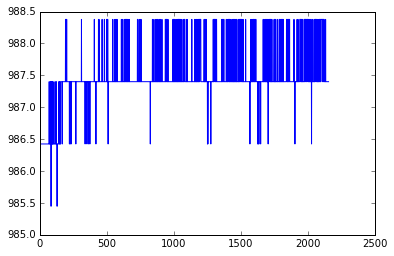

In [9]:
plt.plot(b1x)

In [10]:
df = pd.DataFrame({'b1x':b1x, 'b1y':b1y, 'b2x':b2x, 'b2y':b2y,'b3x':b3x, 'b3y':b3y,'b4x':b4x, 'b4y':b4y})
df.describe()

,b1x,b1y,b2x,b2y,b3x,b3y,b4x,b4y
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,987.476764,987.492618,988.805852,989.833245,1020.997510,4609.632202,1378.787698,816.090520
std,0.463837,0.587983,61.692290,77.966588,412.780627,4100.539316,990.727298,635.559964
min,985.447798,985.447798,985.447798,985.447798,0.976658,231.467917,985.447798,0.976658
25%,987.401113,987.401113,987.401113,987.401113,987.401113,494.188886,987.401113,494.188886
50%,987.401113,987.401113,987.401113,987.401113,987.401113,2093.954488,987.401113,494.188886
75%,987.401113,987.401113,987.401113,987.401113,987.401113,8997.949018,987.401113,1606.358043
max,988.377771,995.214376,3851.938666,3851.938666,9062.408438,9012.598887,4188.885633,4187.908975


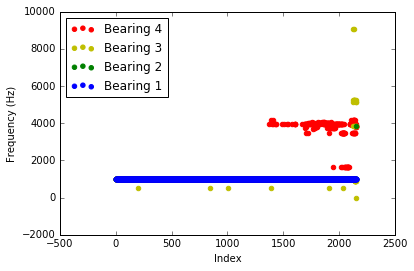

In [11]:
plt.scatter(range(len(b4x)),b4x, color='r', label='Bearing 4')
plt.scatter(range(len(b3x)),b3x, color='y',label='Bearing 3')
plt.scatter(range(len(b2x)),b2x, color='g',label='Bearing 2')
plt.scatter(range(len(b1x)),b1x, color='b',label='Bearing 1')

plt.xlabel("Index")
plt.ylabel("Frequency (Hz)")
plt.legend(loc='upper left')

Note that in the above graph, 

* At time=0, all 4 bearings show a dominant frequency of ~987 Hz (overlapped)
* Bearings 3 & 4 show signs of behavioral change over time, as shown by change in dominant frequency
* Bearings 1 & 2 remain normal throughout until the last index due to failure of other two bearings

# Examples of FFT Signatures

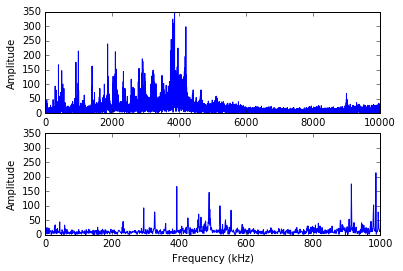

In [12]:
data=pd.read_csv("data/2003.11.25.23.39.56", header=None, names=["b1x","b1y","b2x","b2y","b3x","b3y","b4x","b4y"], delimiter=r"\s+")

src=data.b4x
import scipy.fftpack

N = 20480
T = 1.0 / 20000.0
yf = scipy.fftpack.fft(src)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

freqs=xf[1:]
amps=np.abs(yf[0:N/2])[1:]

plt.subplot(2, 1, 1)
plt.plot(freqs, amps)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freqs, amps)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
plt.xlim(0, 1000) 
plt.savefig('negative.png')

## ^ The FFT graph above shows that the wheel bearing is malfunctioning and close to failure.

(0, 1000)

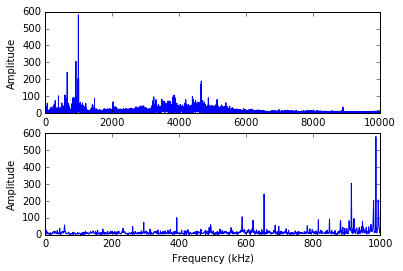

In [13]:
src=data.b1x
import scipy.fftpack

N = 20480
T = 1.0 / 20000.0
yf = scipy.fftpack.fft(src)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

freqs=xf[1:]
amps=np.abs(yf[0:N/2])[1:]

plt.subplot(2, 1, 1)
plt.plot(freqs, amps)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freqs, amps)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")
plt.xlim(0, 1000) 

## ^ The FFT graph above shows that the wheel bearing is normal and working well.